# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

# Use requests to fetch the HTML content
response = requests.get(url)
html_content = response.text 


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html_content, 'html.parser')

In [6]:
# Finding 'table' in the parsed HTML 
html_table = soup.find('table')

# Extracting table headers 
headers = [header.text.strip() for header in html_table.find_all('th')]

# Extracting table rows 
rows = []
for row in html_table.find_all('tr')[1:]:  # Skipping the header row
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    rows.append(cols)

# Printing the extracted data to check if on track
print("Headers:", headers)
for row in rows:
    print("Row:", row)

Headers: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
Row: ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
Row: ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
Row: ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
Row: ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
Row: ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
Row: ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
Row: ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
Row: ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
Row: ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
Row: ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
Row: ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
Row: ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
Row: ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
Row: ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
Row: ['163', '2012-09-02', '27', '164', '6', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
table_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    row_dict = dict(zip(headers, row))
    table_data.append(row_dict)

# Printing list to check if on track
for entry in table_data:
    print(entry)

{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}
{'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}
{'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}
{'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}
{'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}
{'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}
{'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}
{'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'min_temp':

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(rows, columns=headers)

In [9]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
print("Initial Data Types:")
print()
print(mars_df.dtypes)

Initial Data Types:

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Change data types for data analysis
mars_df[headers[1]] = pd.to_datetime(mars_df[headers[1]], errors='coerce')
mars_df['sol'] = pd.to_numeric(mars_df['sol'], errors='coerce').astype('Int64')
mars_df['ls'] = pd.to_numeric(mars_df['ls'], errors='coerce').astype('Int64')
mars_df['month'] = pd.to_numeric(mars_df['month'], errors='coerce').astype('Int64')
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'], errors='coerce').astype('float64')
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'], errors='coerce').astype('float64')


In [12]:
# Confirm type changes were successful by examining data types again
print("Final Data Types:")
print()
print(mars_df.dtypes)

Final Data Types:

id                          object
terrestrial_date    datetime64[ns]
sol                          Int64
ls                           Int64
month                        Int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
mars_months = mars_df.groupby('month')['month'].count()
mars_months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: Int64

In [14]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_df['sol'].nunique()
martian_days

1867

In [15]:
# 3. What is the average low temperature by month?
avg_temp = mars_df.groupby('month')['min_temp'].mean()
avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Temperature in Celcius')

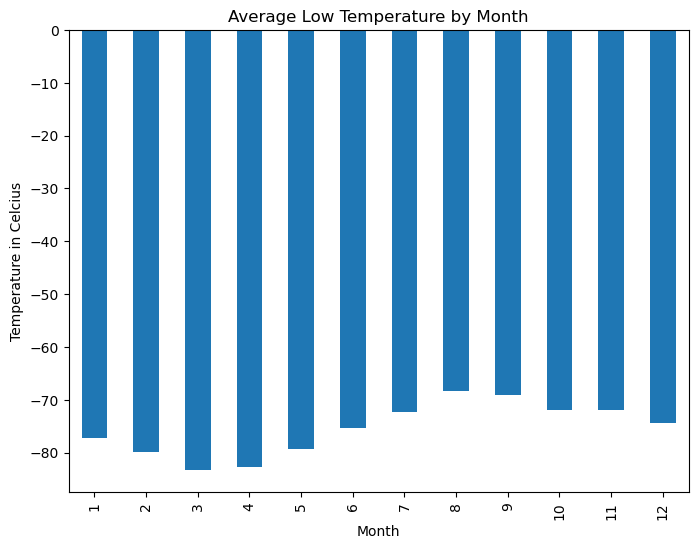

In [16]:
# Plot the average temperature by month
avg_temp.plot(kind='bar', figsize=(8,6))
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')

Text(0, 0.5, 'Temperature (°C)')

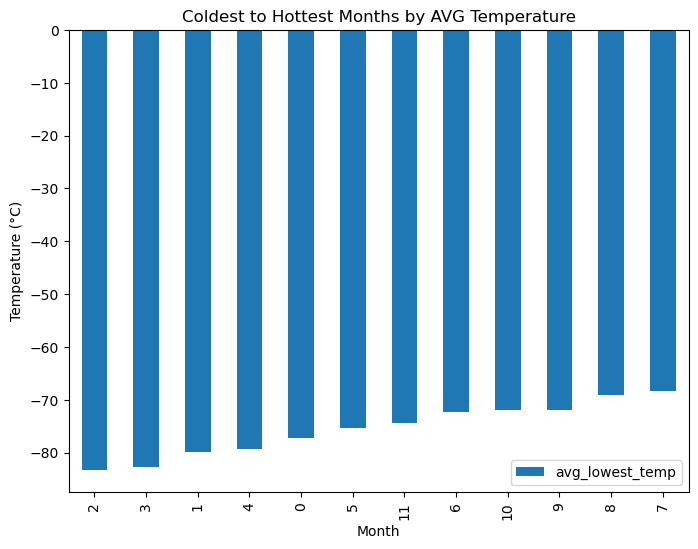

In [17]:
# Identify the coldest and hottest months in Curiosity's location

# New DataFrame for sorting 
cold_hot = pd.DataFrame({'month': avg_temp.index, 'avg_lowest_temp': avg_temp.values})

# Sort months by average lowest temperature (coldest to hottest)
cold_hot = cold_hot.sort_values(by='avg_lowest_temp')

# Plotting BarPlot utilising the data 
cold_hot.plot(kind='bar', y='avg_lowest_temp', figsize=(8, 6))
plt.title('Coldest to Hottest Months by AVG Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')


Analysis:

On average, the minimum temperature on Mars is lowest during the second Martian month and highest during the seventh Martian month. Nevertheless, temperatures remain extremely cold throughout the Martian year by human standards.

In [18]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Atmospheric Pressure')

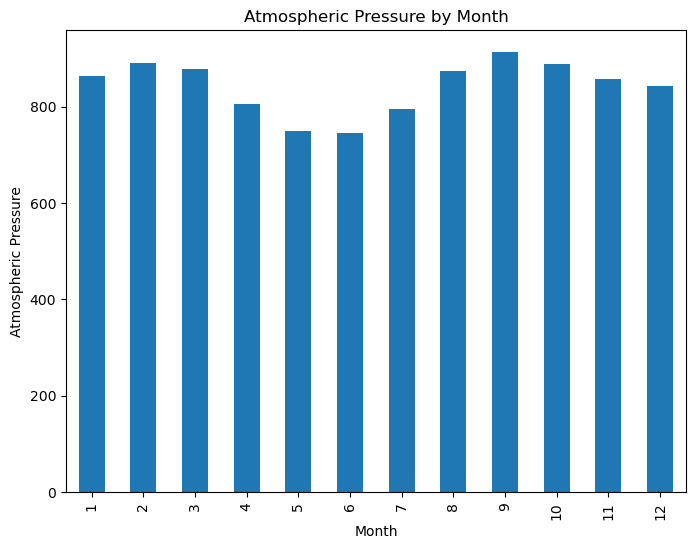

In [19]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', figsize=(8,6))
plt.title('Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

Analysis:

On average, atmospheric pressure on Mars reaches its lowest point during the sixth month and its highest point during the ninth month.

Text(0, 0.5, 'Minimum Temperature')

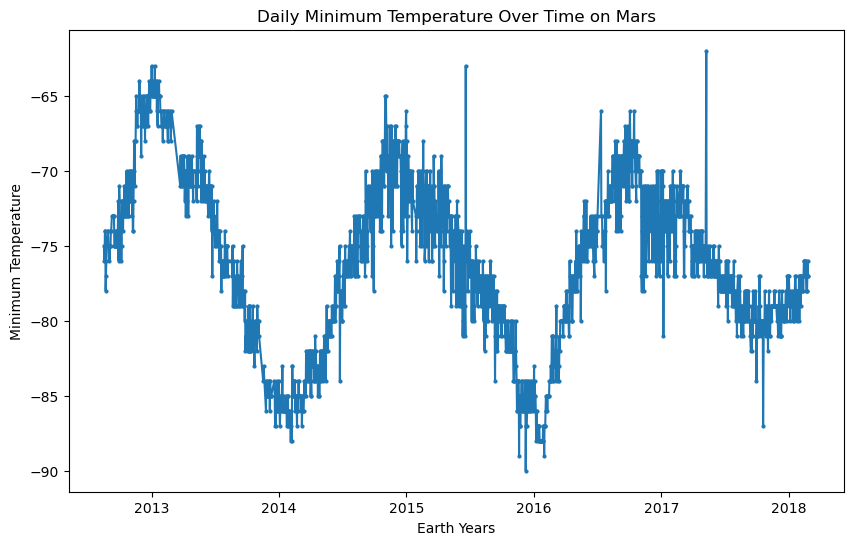

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Ploting minimum daily temperature over time
plt.figure(figsize=(10, 6))
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'], marker='o', linestyle='-', 
         markersize=2, label='Daily Minimum Temperature')

# Plot labels
plt.title('Daily Minimum Temperature Over Time on Mars')
plt.xlabel('Earth Years')
plt.ylabel('Minimum Temperature')


Analysis:

The interval between peaks measures approximately just under two Earth years, roughly 680 days. Based on the plot, it suggests that a Martian year lasts almost two Earth years. Further research online confirms that a Mars year spans 687 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
mars_df.to_csv('mars_df.csv', index=False)

In [23]:
browser.quit()